# Introduction to NumPy and pandas

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shinchu/dataviz-notebooks/blob/main/week_1/intro-to-numpy-pandas.ipynb)

Pythonでデータを操作する時によく使うライブラリであるNumPyとpandasの練習をしましょう。

セルを実行すれば動くようになっています。

`# your code goes here`と書かれているところは、自分でコードを書いて実行してみましょう。

## NumPy (Numeric Python)

Pythonを利用して科学計算を行うための基本的なライブラリで、高速な多次元配列操作ができます。CとFortranで書かれた低水準ライブラリで実装されています。

もともとPythonの大量データの処理は比較的遅いのですが、NumPyでは大きな配列に対して一斉に並列操作ができるのでとても高速になります。

NumPyを理解する鍵は配列です。ここでは、実際のNumPyの例を使って基本的な配列操作を取り上げます。

本講義ではNumPyを直接使うことはあまりありませんが、pandasの中ではNumPyによる処理が多用されています。また、今後機械学習などデータサイエンスの他の分野を勉強する時には使うことになるので、概要を見ておきましょう。

In [11]:
# numpyをnpという名前で読み込む
# from numpy import * などとして、名前空間に全変数をインポートするのは止めましょう

import numpy as np

### NumPy配列

NumPyは、多次元配列`ndarray`オブジェクトを中心に構築されています。

`ndarray`の主要プロパティは次元数（`ndim`）、形状（`shape`）、数値型（`dtype`）です。数値の同じ配列の形状を必要に応じて作り直すことができます。

In [25]:
# ndarrayの作成と足し算

a = np.array([1, 2, 3])
a + a

array([2, 4, 6])

In [6]:
# ndarrayの主要プロパティを確認する関数

def print_array_details(a):
    print(f"Dimensions: {a.ndim}, shape: {a.shape}, dtype: {a.dtype}")

In [7]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [8]:
a

array([1, 2, 3, 4, 5, 6, 7, 8])

In [9]:
print_array_details(a)

Dimensions: 1, shape: (8,), dtype: int64


1次元の配列であることが分かります。デフォルトではこの配列は64ビット整数型です。

`reshape`メソッドを使って配列の形状と次元数を変更できます。`a`を2つの4要素配列からなる2次元配列に変換します。

In [12]:
a = a.reshape([2, 4])

In [13]:
a

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [14]:
print_array_details(a)

Dimensions: 2, shape: (2, 4), dtype: int64


更に3次元配列に変換することもできます。

In [15]:
a = a.reshape([2, 2, 2])

In [16]:
a

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [17]:
print_array_details(a)

Dimensions: 3, shape: (2, 2, 2), dtype: int64


形状と数値型は、配列の作成時や後からでも指定できます。配列の数値型を変更するには、`astype`メソッドを使います。

In [18]:
x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
x.shape

(2, 3)

In [19]:
x.shape = (6,)

In [20]:
x

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [23]:
x = x.astype('int64')

In [24]:
x.dtype

dtype('int64')

### 配列の作成

`zeros`関数や`ones`関数などを使うと、あらかじめ要素が入った配列を作成できます。

`zeros`関数は、配列を0で埋めます。デフォルトの数値型は`float64`です。

In [26]:
a = np.zeros([2, 3])

In [27]:
a

array([[0., 0., 0.],
       [0., 0., 0.]])

In [28]:
a.dtype

dtype('float64')

`ones`関数は、配列を1で埋めます。デフォルトの数値型は`zeros`と同じです。

In [29]:
np.ones([2, 3])

array([[1., 1., 1.],
       [1., 1., 1.]])

`random`関数は、形状を指定したランダムな配列を作成します。数値は$0 \leq x < 1$の乱数です。

In [36]:
np.random.random([2, 3])

array([[0.23044958, 0.07272154, 0.75779941],
       [0.47238918, 0.51331677, 0.44098482]])

`linspace`は一定の均等な間隔で指定数のサンプルを作成します。`arange`も似ていますが、サンプル数ではなく、刻み幅を指定します。

In [37]:
# 2から10の範囲の5つの数値

np.linspace(2, 10, 5)

array([ 2.,  4.,  6.,  8., 10.])

In [38]:
# 刻み幅2で2から10まで（10は含まれない）

np.arange(2, 10, 2)

array([2, 4, 6, 8])

### 配列のインデックス指定とスライス

1次元配列は、Pythonリストと同様にインデックス指定やスライス操作ができます。

In [39]:
a = np.array([1, 2, 3, 4, 5, 6])

In [42]:
a[2]

3

In [41]:
a[3:5]

array([4, 5])

In [43]:
# 0から4までの要素を1つおきに0に設定する
a[:4:2] = 0

In [44]:
a

array([0, 2, 0, 4, 5, 6])

In [46]:
# 逆順に出力する
a[::-1]

array([6, 5, 4, 0, 2, 0])

多次元配列のインデックス指定は1次元と同様です。次元ごとに独自のインデックス指定とスライス操作ができ、カンマ区切りのタプルで指定します。

すべての次元を選択する省略記号「...」もあります。

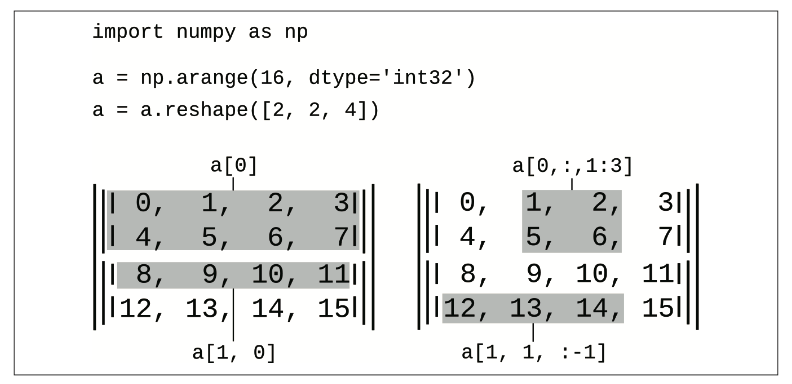

In [47]:
a = np.arange(8)

In [48]:
a

array([0, 1, 2, 3, 4, 5, 6, 7])

In [49]:
a.shape = (2, 2, 2)

In [50]:
a

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [51]:
a[1]

array([[4, 5],
       [6, 7]])

In [52]:
a[1, :]

array([[4, 5],
       [6, 7]])

In [53]:
a[1, ...]

array([[4, 5],
       [6, 7]])

In [54]:
a[..., 0]

array([[0, 2],
       [4, 6]])

In [55]:
a[:, :, 0]

array([[0, 2],
       [4, 6]])

### 基本操作

NumPy配列には、基本的な数学演算を通常の数値とほぼ同じように適用することができます。

In [58]:
a = np.arange(1, 7)

In [59]:
a

array([1, 2, 3, 4, 5, 6])

In [60]:
a.shape = ([2, 3])

In [62]:
a * 2

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [64]:
a - 2

array([[-1,  0,  1],
       [ 2,  3,  4]])

In [65]:
a / 2

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [66]:
a < 3

array([[ True,  True, False],
       [False, False, False]])

便利な配列メソッドと組み込み関数もたくさんあります。

In [67]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [73]:
a.min()

1

In [72]:
a.min(axis=1)

array([1, 4])

In [69]:
a.sum(axis=0)

array([5, 7, 9])

In [70]:
a.mean(axis=1)

array([2., 5.])

In [71]:
a.std(axis=1)

array([0.81649658, 0.81649658])

In [81]:
# 三角関数
pi = np.pi
a = np.array([pi, pi/2, pi/4, pi/6])

In [82]:
# ラジアンから度数へ変換
np.degrees(a)

array([180.,  90.,  45.,  30.])

In [83]:
sin_a = np.sin(a)

In [84]:
sin_a

array([1.22464680e-16, 1.00000000e+00, 7.07106781e-01, 5.00000000e-01])

In [86]:
# 四捨五入
np.round(sin_a, 7) # 小数点第7位に四捨五入

array([0.       , 1.       , 0.7071068, 0.5      ])

In [88]:
# 累積和
a = np.arange(8).reshape((2, 4))

In [89]:
a

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [90]:
np.cumsum(a, axis=1)

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22]])

In [91]:
np.cumsum(a)

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [146]:
# 全てが1の1次元配列（長さ8）を作りましょう
# your code goes here


In [143]:
# 上で作った配列を2次元配列にしてみましょう
# your code goes here


In [144]:
# 上で作った配列を3次元配列にしてみましょう
# your code goes here


In [145]:
# 上で作った配列の各次元の最初の要素を0にしてみましょう
# your code goes here


### 配列関数の作成

前述したように、`array`オブジェクトはpandasの中でも中心的に使われています。そのため、`array`を処理できる関数を自作できるようになると、後々のデータ処理に役立ちます。

ここでは、`array`を利用して移動平均を計算する関数を書いてみましょう。

移動平均は、時系列データを平滑化する手法です。移動平均を求めることで、データの大まかな傾向をつかみやすくなります。

例えば、商品の売上個数データが下記のようにあったとします。

|日付|売上個数|
|:--|--:|
|10/1|5|
|10/2|6|
|10/3|7|
|10/4|10|
|10/5|15|
|10/6|5|
|10/7|6|

10/6の売上個数の3日間の移動平均は10/4–6の売上個数の平均で、`10.3`個です。10/7の3日間の移動平均は、10/5–7の売上個数の平均で、`8.7`個です。

In [149]:
def moving_average(a, n=3):
    """
    a: 配列
    n: 移動平均の大きさ（直近何個分のデータをとるか）
    
    return: 移動平均
    """
    
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

ここではまず、与えられた配列の累積和をとっています。

In [98]:
a = np.array([5, 6, 7, 10, 15, 5, 6])

In [99]:
csum = np.cumsum(a, dtype=float)

In [100]:
csum

array([ 5., 11., 18., 28., 43., 48., 54.])

次に、累積和配列のインデックスが$n$番目の数字から始め、すべての$i$に対して$i-n$番目の値を引きます。すると、$i$は$a$の直近の$n$個の値の和になります。

In [101]:
n = 3

csum[n:] = csum[n:] - csum[:-n]

In [102]:
csum

array([ 5., 11., 18., 23., 32., 30., 26.])

移動平均はインデックス$n-1$番目以降でしか意味を持たないので、その値を移動平均の大きさ$n$で割って平均を求めます。

In [148]:
csum[n - 1:]/n

array([ 6.        ,  7.66666667, 10.66666667, 10.        ,  8.66666667])

結果を見ると、10/6の売上個数の3日間の移動平均が`10.0`、10/7の3日間の移動平均が`8.7`となっていることが分かります。

`10.3`となるはずのところが`10.0`となっているのは、コンピュータによる数値計算の誤差によるものです。

詳しくは[こちら](https://e-words.jp/w/%E4%B8%B8%E3%82%81%E8%AA%A4%E5%B7%AE.html#:~:text=%E4%B8%B8%E3%82%81%E8%AA%A4%E5%B7%AE%20%E3%80%90round%2Doff%20error%E3%80%91,%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E3%81%AA%E3%81%A9%E3%81%A7%E7%8F%BE%E3%82%8C%E3%82%8B%E3%80%82)

高い精度が求められる計算では問題になることがあるので、注意する必要があります。

---

NumPyの基本的な操作は以上です。より詳しい機能については、公式ドキュメントを参照してみてください。

* [NumPy quickstart](https://numpy.org/devdocs/user/quickstart.html)
* [NumPy documentation](https://numpy.org/doc/stable/)

## pandas

pandasは、ExcelファイルやCSVファイルのような表形式のデータを高速に処理することができるライブラリです。

主な機能として、

* CSVファイルの読み書き
* 統計量の算出
* 並べ替え
* データの選択
* 条件指定による選択
* 欠損値の除去／補間

があります。

pandasにはデータ処理に便利なデータ構造と関数が含まれています。特にDataFrameオブジェクトは、2次元の表形式でデータを保持することができて取り扱いに便利なので、よく使われます。

In [3]:
import pandas as pd

### pandasの基本

####  データ形式

pandasが扱う主なデータ構造は、`Series`と`DataFrame`です。`Series`はNumPy配列のラッパーです。

##### Series

* 1次元のリストの値とインデックスが付いたオブジェクト
* 特別に指定しない限りは、0からインデックスが付与される

In [4]:
sample_series = pd.Series([1, 2, 3])

In [5]:
sample_series

0    1
1    2
2    3
dtype: int64

In [6]:
type(sample_series)

pandas.core.series.Series

##### DataFrame

* データ分析に使うデータはDataFrameとして扱うことが多い
* Seriesの集合体で、行と列からなる

In [7]:
sample_df = pd.DataFrame({
    "名前": ["David", "Eliza", "Fred"],
    "点数": [90, 87, 68]
})

In [8]:
sample_df

,名前,点数
0,David,90
1,Eliza,87
2,Fred,68


In [9]:
type(sample_df)

pandas.core.frame.DataFrame

### 基本的な操作

#### CSVファイルを読み込む

`pd.read_csv()`でカンマ区切りのファイルを読み込みます。区切り文字を指定することで、タブ区切りなどのファイルも読み込むことができます。

今回はURLから読み込みますが、PC上に保存されているローカルファイルもパスを指定することで、同じ要領で読み込めます。

Google Driveに保存されているファイルを読み込むこともできます。ぜひ方法を調べてみてください。

In [10]:
new_data = pd.read_csv("https://raw.githubusercontent.com/shinchu/dataviz-notebooks/main/data/week_1/read_sample.csv")

In [11]:
new_data

,名前,点数
0,Alice,77
1,Bob,59
2,Charlie,87


#### CSVファイルとして保存する

`DataFrame.to_csv()`でデータフレームをカンマ区切りのファイルとして保存できます。

`sep="\t"`とすると、タブ区切りで保存できます。

In [20]:
sample_df.to_csv("sample_df.csv", index=False, header=True, sep=",")

In [ ]:
# Colabからファイルをダウンロードする

from google.colab import files

files.download("sample_df.csv")

### データフレームを扱う

Titanic datasetを使って、pandasの使い方を学びましょう。

これは、1912年に北大西洋で氷山に衝突して沈没したタイタニック号の乗客の生存状況に関するデータセットです。

In [12]:
# ライブラリのインポート

import pandas as pd
import numpy as np

In [13]:
# データの読み込み
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

In [14]:
# データの確認
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [18]:
titanic["deck"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

このデータセットには、891データ（行）、15属性（列）が含まれていることが分かります。

15の属性が意味するところは、下記の通りです。
各属性の意味はの、データ取得時に整理しておきましょう。

オープンデータであれば、カラム情報は通常公開されています。  
ログを取得したり、スクレイピングをしたりして自分で作成するデータの場合は、データ仕様書も作りましょう。

| カラム | カラムの説明 | 型情報 | 値の説明 | NULL | UNIQ | CHECK |
|---|---|---|---|---|---|---|
| survived | 生存したかどうか | フラグ | 0=死亡, 1=生存 |  |  |  |
| pclass | チケットの等級 | カテゴリ | 1=上層, 2=中級, 3=下層 |  |  |  |
| sex | 性別 | カテゴリ | male, female |  |  |  | 
| age | 年齢 | 数値 |  |  |  | >=0 | 
| sibsp | 乗船した兄弟、配偶者の数 | 数値 |  |  |  | >=0 |
| parch | 乗船した両親、子供の数 | 数値 |  |  |  | >=0 |
| fare | 乗船代金 | 数値 |  |  |  | >=0 | 
| embarked | 出港地 | カテゴリ | C=Cherbourg, Q=Queenstown, S=Southampton |  |  |  |
| class | チケットの等級 | カテゴリ | First, Second, Third |  |  |  |
| who | 属性 | カテゴリ | man, woman, child |  |  |  |
| adult_male | 成人男性かどうか | フラグ | True, False |  |  |  |
| deck | 乗船していたデッキ | カテゴリ | A, B, C, D, E, F, G | ✓ |  |  |
| embark_town | 出港地 | カテゴリ | Cherbourg, Queenstown, Southampton |  |  |  |
| alive | 生存したかどうか | フラグ | yes, no |  |  |  |
| alone | 一人で乗船したかどうか | フラグ | True, False |  |  |  |


#### 1行目の要素を取得する


pandasでは、整数の位置インデックスを参照できます。位置インデックスは0から始まる整数です。参照する場合は、`iloc`属性を利用します。

In [24]:
titanic.iloc[0]

survived                 0
pclass                   3
sex                   male
age                   22.0
sibsp                    1
parch                    0
fare                  7.25
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 0, dtype: object

In [25]:
# 3行目の要素を取得してみましょう
# your code goes here


#### 特定の列（カラム）を取得する

取得したいカラム名を指定することで、特定のカラムをシリーズ形式で抽出できます。

In [26]:
titanic_class = titanic["class"]

In [27]:
titanic_class

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: object

In [19]:
# 出港地を示すカラムを取得してみましょう
# your code goes here


#### データの行数を数える

ヒント：文字列やリストの長さを数えるときは、`len()`関数を使います。

In [21]:
len("data science")

12

In [22]:
len(["apple", "orange", "mango", "banana"])

4

In [23]:
# titanicの行数を数えてみましょう
# your code goes here


####  データの集約をする

データを取得した後に、全体像を把握するためにデータを集約することがよくあります。

また、データの集約はデータ可視化の準備としても重要です。

ここではpandasによるいくつかのデータ集約方法を見ていきましょう。

##### 要約統計量を確認する

`DataFrame.describe()`関数を使うと、数値の列の要約統計量が確認できます。概要を把握する時に便利です。

In [24]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### カラム内のデータ数を数える

特定のカラムに含まれる値について件数を数える場合、`Series.value_counts()`関数を使います。

In [35]:
titanic["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [42]:
# 各出港地から乗船した人がどれくらいいたか数えてみましょう
# your code goes here



#####  列データのユニーク要素数を数える

列データの中にどれだけユニークな（重複のない）要素があるのかを調べる場合には、`Series.nunique()`関数を使います。

In [38]:
titanic["class"].nunique()

3

In [40]:
# 乗客が乗っていたデッキが何個あったか数えてみましょう
# your code goes here



##### グループごとの集約

列に条件を付けて集約する必要がある時は（チケットの等級ごとの生存者数を知りたいなど）、`DataFrame.groupby()`関数を使うことができます。

In [45]:
titanic.groupby("sex")["class"].value_counts()

sex     class 
female  Third     144
        First      94
        Second     76
male    Third     347
        First     122
        Second    108
Name: class, dtype: int64

In [46]:
# チケットの等級ごとの生存者数を見てみましょう
# your code goes here



`Series.value_counts()`関数では件数を取得しました。`Series.mean()`関数を使うことで、平均値を出すことができます。

In [48]:
titanic.groupby("sex").mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


`DataFrame.groupby()`関数を使った出力は、デフォルトでは集約に使ったカラムがインデックスになるため、インデックスにしない場合は、`as_index=False`と引数を指定します。

In [49]:
titanic.groupby("sex", as_index=False).mean()

,sex,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
1,male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


`DataFrame.groupby()`関数は2つ以上のカラムを指定することもできます。2つ以上の列で集約する場合、リストとして指定します。

In [51]:
titanic.groupby(["sex", "class"], as_index=False).mean()

,sex,class,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,female,First,0.968085,1.0,34.611765,0.553191,0.457447,106.125798,0.000000,0.361702
1,female,Second,0.921053,2.0,28.722973,0.486842,0.605263,21.970121,0.000000,0.421053
2,female,Third,0.500000,3.0,21.750000,0.895833,0.798611,16.118810,0.000000,0.416667
3,male,First,0.368852,1.0,41.281386,0.311475,0.278689,67.226127,0.975410,0.614754
4,male,Second,0.157407,2.0,30.740707,0.342593,0.222222,19.741782,0.916667,0.666667
5,male,Third,0.135447,3.0,26.507589,0.498559,0.224784,12.661633,0.919308,0.760807


ちなみに、集約結果の関数を指定しないと、pandasのオブジェクトが返されます。

In [53]:
titanic.groupby("sex")

#### クロス集計を行う

`pd.crosstab()`関数を使うことで、クロス集計をすることができます。グループの出現頻度を見る時に有用です。

In [55]:
pd.crosstab(titanic["who"], titanic["class"])

class,First,Second,Third
who,,,
child,6,19,58
man,119,99,319
woman,91,66,114


絶対数ではなく比率が知りたい時は、`normalize="index"`という引数を指定します。

In [56]:
pd.crosstab(titanic["who"], titanic["class"], normalize="index")

class,First,Second,Third
who,,,
child,0.072289,0.228916,0.698795
man,0.221601,0.184358,0.594041
woman,0.335793,0.243542,0.420664


#### 条件に該当したデータを抽出する

カラムに含まれる値が特定の条件を満たした行を取得する方法はいくつかあります。

In [57]:
titanic[titanic["who"] == "child"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.00,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
850,0,3,male,4.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
852,0,3,female,9.00,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False
869,1,3,male,4.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


`DataFrame.query()`関数を使うと、複数の条件を簡便に指定できます。

In [62]:
titanic.query("who == 'child' & pclass > 1")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.00,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
850,0,3,male,4.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
852,0,3,female,9.00,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False
869,1,3,male,4.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


#### データの並べ替えを行う

昇順や降順にデータを並べ替える時には、`DataFrame.sort()`関数を使います。

In [64]:
titanic.sort_values("fare", ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
822,0,1,male,38.0,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


In [68]:
# 乗客の年齢の昇順にデータを並び替えてみましょう
# your code goes here



#### カラム名の変更を行う

`DataFrame.rename()`関数を使うことで、カラム名を変更することができます。

In [70]:
titanic.rename(columns={"age": "年齢"})

,survived,pclass,sex,年齢,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [71]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


いずれの変更も、もとのDataFrameを変えているわけではないことに注意してください。  
変更を保持したい場合は、新しい変数（またはもとの変数）に代入する必要があります。

In [72]:
titanic_renamed = titanic.rename(columns={"age": "年齢"})

In [75]:
titanic_renamed.head(1)

,survived,pclass,sex,年齢,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [76]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


---

pandasの基本的な操作は以上です。

使っていくうちにもっと複雑な処理をしたくなると思うので、そんな時は公式ドキュメントを調べてみましょう。

* [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
* [pandas documentation](https://pandas.pydata.org/docs/index.html)